In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_array, check_is_fitted

import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import inspect
import random
import shutil

from datetime import datetime
from dateutil.relativedelta import relativedelta

from scipy import optimize, ndimage
from sklearn import decomposition, cluster, model_selection, metrics
import sklearn

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import utils.dataset_utils as dataset
import utils.train_utils as train

In [10]:
# use 368 to 1750
N_WAVE = 2126
s = 1
start_index, end_index = 0, 2126

X = np.load("../data/Raman/Alina_art_1_1.npy", 'r')[:,:,start_index: end_index]

wavelength = np.load("../data/Raman/wavelength.npy", 'r')[start_index: end_index]

shape_X = X.shape 

X = copy.copy(X.reshape(-1, X.shape[-1]))


In [11]:
def split_Raman_af(X):
    a = X

    # remove spikes from data
    a1 = ndimage.gaussian_filter(a, (0, 10), mode='nearest')
    a = np.min([a, a1], axis=0)

    a1 = ndimage.gaussian_filter(a, (0, 20), mode='nearest')
    a = np.min([a, a1], axis=0)

    a1 = ndimage.gaussian_filter(a, (0, 30), mode='nearest')
    a = np.min([a, a1], axis=0)

    a1 = ndimage.gaussian_filter(a, (0, 40), mode='nearest')
    a = np.min([a, a1], axis=0)

    a1 = ndimage.gaussian_filter(a, (0, 50), mode='nearest')
    a = np.min([a, a1], axis=0)

    a1 = ndimage.gaussian_filter(a, (0, 60), mode='nearest')
    a = np.min([a, a1], axis=0)
    
    # Restore Edges
    c = 50
    a[:,:c] = X[:,:c]
    a[:,-c:] = X[:,-c:]
    
    #smooth everyting
    for _ in range(100):
        a1 = ndimage.gaussian_filter(a, (0, 10), mode='nearest')
        a = np.min([a, a1], axis=0)
        a[:,0] = X[:,0]
    return a


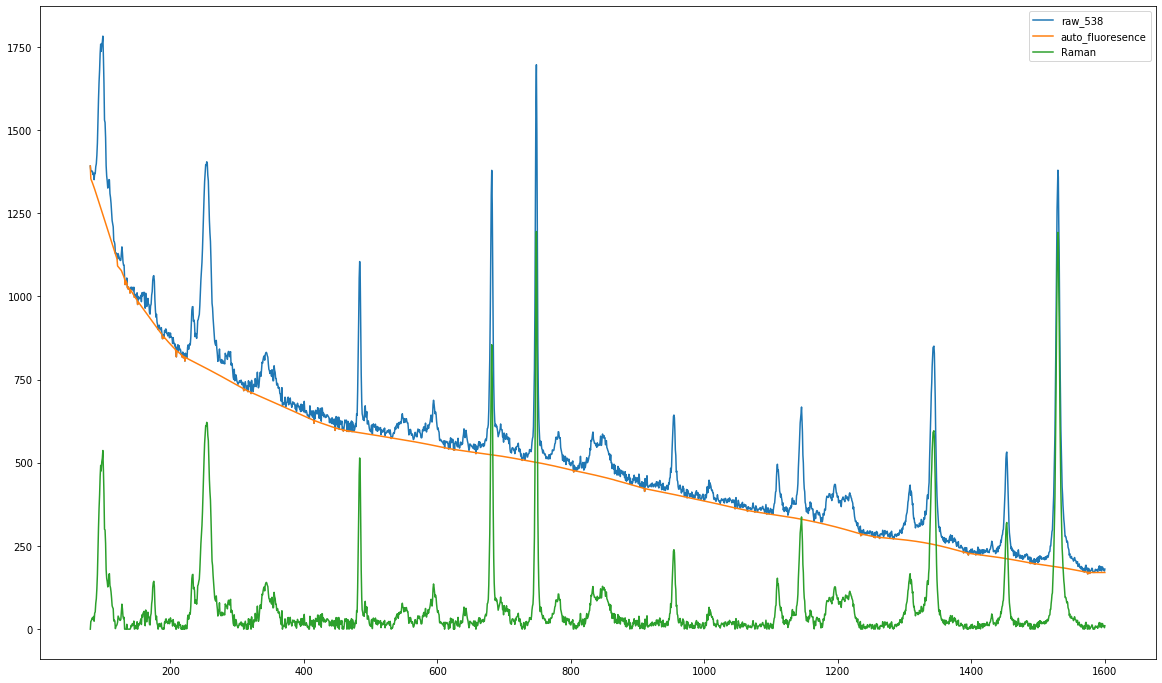

In [12]:
a = split_Raman_af(X)
i = random.randint(0,666)
i = 538
plt.figure(figsize = (20,12))
plt.plot(wavelength, X[i], label='raw_'+str(i))
plt.plot(wavelength, a[i], label='auto_fluoresence')
plt.plot(wavelength, X[i] - a[i], label='Raman')
plt.legend()
plt.show()

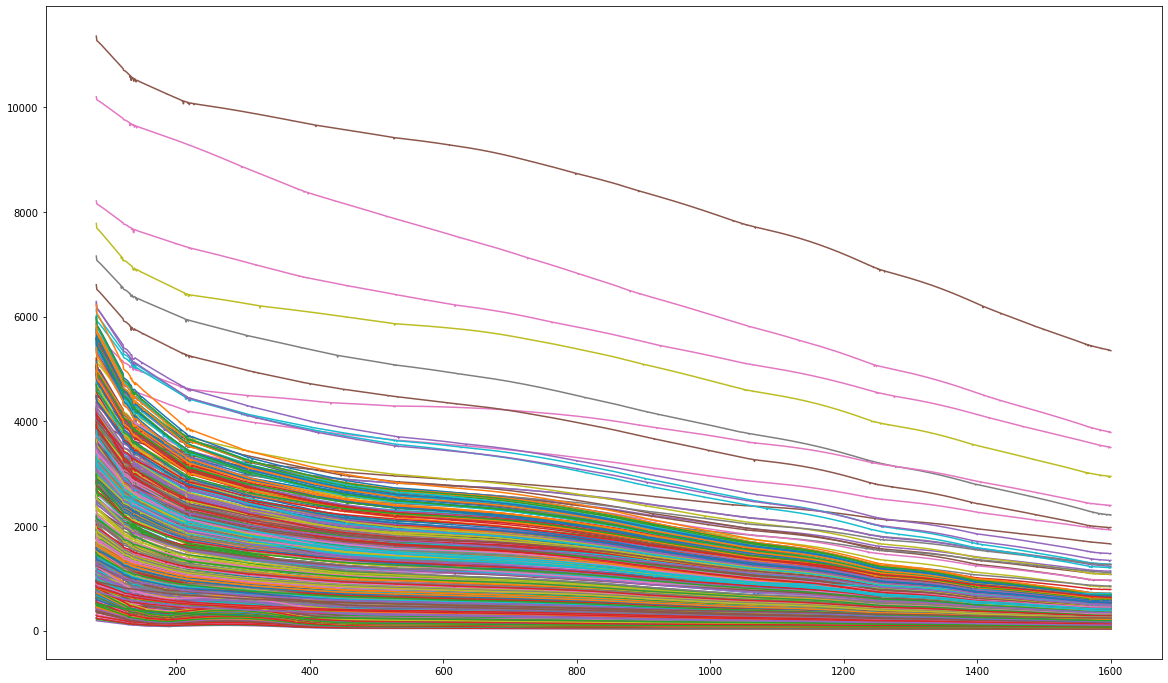

In [13]:
#Check for smoothness to see if the method works
i = random.randint(0,666)
plt.figure(figsize = (20,12))
for i in range(666):
# plt.plot(wavelength, X[i], label='raw_'+str(i))
    plt.plot(wavelength, a[i], label='auto_fluoresence')
# plt.plot(wavelength, X[i] - a[i], label='Raman')
# plt.legend()
plt.show()